# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
y, X = patsy.dmatrices('tip ~ sex  + time + smoker + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  time[T.Dinner]  smoker[T.No]  net_bill
          1              1               1             1     15.98
          1              0               1             1      8.68
          1              0               1             1     17.51
          1              0               1             1     20.37
          1              1               1             1     20.98
          1              0               1             1     20.58
          1              0               1             1      6.77
          1              0               1             1     23.76
          1              0               1             1     13.08
          1              0               1             1     11.55
          1              0               1             1      8.56
          1              1               1             1     30.26
          1              0               1             1     13.85
          1              0   

In [4]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

**Modelo 1**

A seguir temos o modelo sem as variáveis sex, time e smoker que foram avaliadas como estatisticamente insignificantes

In [5]:
reg1 = smf.ols('tip ~ net_bill', data = tips).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 06 May 2023   Prob (F-statistic):           5.02e-23
Time:                        10:46:48   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

**Analisando os resíduos do Modelo 1**

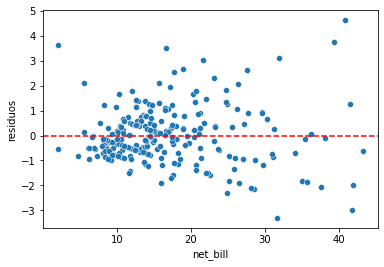

In [6]:
tips['residuos'] = reg1.resid

sns.scatterplot(x = 'net_bill', y = 'residuos', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Modelo 1 - R²**

In [7]:
R2_1 = reg1.rsquared
print('R²:',round(R2_1,3))

R²: 0.333


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

**Modelo 2**

A seguir temos o modelo retirado as variáveis sex,time e smoker que não são estatisticamente significativas

In [8]:
reg2 = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 06 May 2023   Prob (F-statistic):           2.60e-21
Time:                        10:46:48   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

**Analisando os resíduos do Modelo 2**

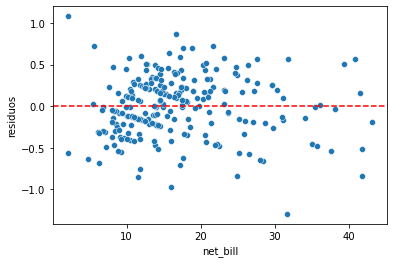

In [9]:
tips['residuos'] = reg2.resid

sns.scatterplot(x = 'net_bill', y = 'residuos', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Modelo 2 - R²**

In [10]:
tips['tip_pred'] = np.exp(reg2.fittedvalues)

r = tips[['tip_pred', 'tip']].corr().iloc[0,1]

R2_2 = r**2
print('R²:',round(R2_2,3))

R²: 0.316


**Modelo 3**

In [11]:
reg3 = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 06 May 2023   Prob (F-statistic):           5.62e-22
Time:                        10:46:49   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

**Analisando os resíduos do Modelo 3**

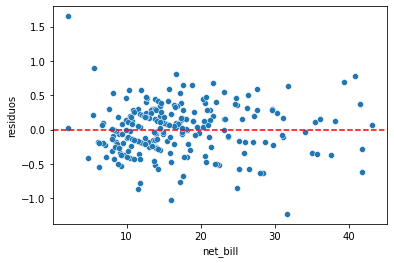

In [12]:
tips['residuos'] = reg3.resid

sns.scatterplot(x = 'net_bill', y = 'residuos', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Modelo 3 - R²**

In [13]:
tips['tip_pred'] = np.exp(reg3.fittedvalues)

r = tips[['tip_pred', 'tip']].corr().iloc[0,1]

R2_3 = r**2
print('R²:',round(R2_3,3))

R²: 0.328


**Modelo 4**

In [14]:
reg4 = smf.ols('np.log(tip) ~ np.power(net_bill,2)', data = tips).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Sat, 06 May 2023   Prob (F-statistic):           7.70e-17
Time:                        10:46:49   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.78

**Analisando os resíduos do Modelo 4**

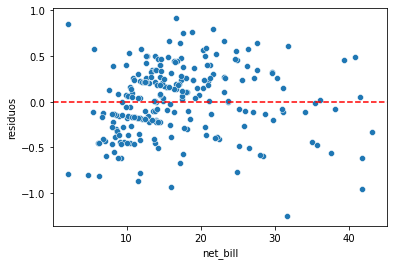

In [15]:
tips['residuos'] = reg4.resid

sns.scatterplot(x = 'net_bill', y = 'residuos', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Modelo 4 - R²**

In [16]:
tips['tip_pred'] = np.exp(reg4.fittedvalues)

r = tips[['tip_pred', 'tip']].corr().iloc[0,1]

R2_4 = r**2
print('R²:',round(R2_4,3))

R²: 0.267


**Comparativo dos Coeficientes de Determinação dos Modelos**

In [17]:

R2_modelos = { 'Modelos': ['Modelo_1','Modelo_2','Modelo_3','Modelo_4'],
               'R2': [R2_1,R2_2,R2_3,R2_4,]    
             }
df= pd.DataFrame(R2_modelos)
df


,Modelos,R2
0,Modelo_1,0.332541
1,Modelo_2,0.315645
2,Modelo_3,0.328377
3,Modelo_4,0.267488


* Modelo 1: Tip x net_Bill
* Modelo 2: log Tip x net_Bill
* Modelo 3: log Tip x log net_Bill
* Modelo 4: log Tip x net_Bill²

In [18]:
round(df.R2.max(),6)

0.332541

O  modelo com melhor coeficiente de determinação(R²) é o Modelo 1

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [19]:
dados = pd.read_csv('previsao_de_renda.csv')
dados.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [20]:
dados.shape

(15000, 16)

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

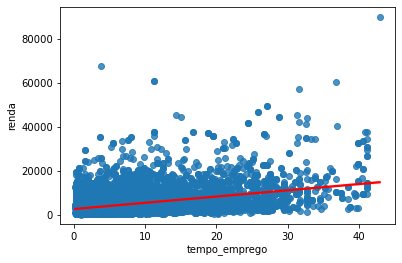

In [22]:
sns.regplot(y = 'renda', x = 'tempo_emprego', data = dados,line_kws={"color" : "red"})

**Modelo 1**

In [23]:
regressao = smf.ols('renda ~ tempo_emprego', data = dados).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        10:46:50   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

**Análise dos Resíduos do Modelo 1**

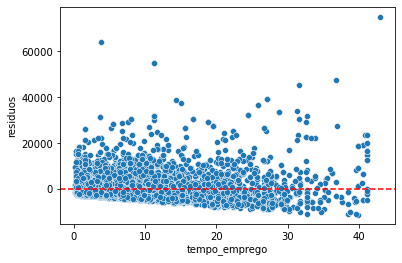

In [24]:
dados['residuos'] = regressao.resid

sns.scatterplot(x = 'tempo_emprego', y = 'residuos', data = dados)
plt.axhline(y=0, color='r', linestyle='--')

Conforme aumenta o tempo de emprego a variância vai aumentando.Poderíamos tentar melhorar essa regressão transformando a variável resposta em um polinômio de segundo grau ou avaliar outras transformações.

**R² do Modelo 2**

In [25]:
R2_1 = regressao.rsquared
print('R²:',round(R2_1,3))

R²: 0.155


**Modelo 2 - regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.**

In [26]:
dados.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,residuos
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,-297.781680
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,3198.435291
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98,719.596548
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69,4250.394720
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37,-2567.777305


In [27]:
regressao2 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data = dados).fit()
print(regressao2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     165.3
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        10:46:50   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12441   BIC:                         2.664e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**R² do Modelo 2**

In [29]:
dados['renda_pred'] = np.exp(regressao2.fittedvalues)

r = dados[['renda_pred', 'renda']].corr().iloc[0,1]

R2_2 = r**2
print('R²:',round(R2_2,3))

R²: 0.243


**Modelo 3 - Refazendo o modelo retirando as variáveis estatisticamente insignificantes do modelo 2**

In [30]:
regressao3 = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego', data = dados).fit()
print(regressao3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     907.7
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        10:46:51   Log-Likelihood:                -13335.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12461   BIC:                         2.672e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

**Análise dos Resíduos do Modelo 3**

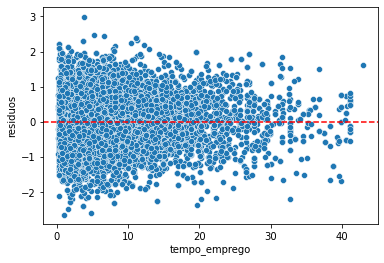

In [31]:
dados['residuos'] = regressao3.resid

sns.scatterplot(x = 'tempo_emprego', y = 'residuos', data = dados)
plt.axhline(y=0, color='r', linestyle='--')

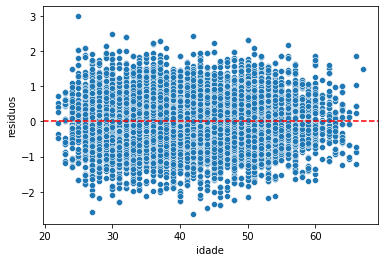

In [32]:
dados['residuos'] = regressao3.resid

sns.scatterplot(x = 'idade', y = 'residuos', data = dados)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='sexo', ylabel='residuos'>

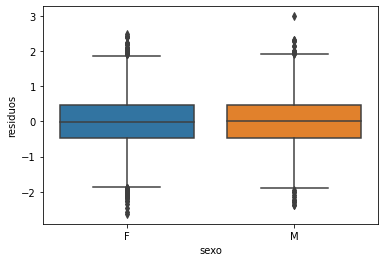

In [33]:
sns.boxplot(x = 'sexo', y = 'residuos', data = dados)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='residuos'>

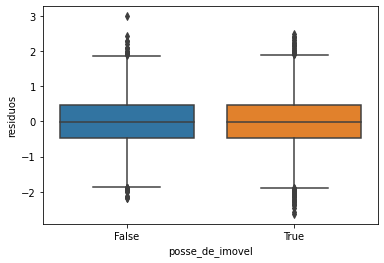

In [34]:
sns.boxplot(x = 'posse_de_imovel', y = 'residuos', data = dados)

In [35]:
dados['renda_pred'] = np.exp(regressao3.fittedvalues)

r = dados[['renda_pred', 'renda']].corr().iloc[0,1]

R2_3 = r**2
print('R²:',round(R2_3,3))

R²: 0.227


Quanto aos resíduos, quando em função da variável tempo de emprego, vemos que a variância está diminuindo um pouco quando aumenta o tempo de emprego, o que mostra que a função não está muito bem ajustada, talvez possamos melhorar fazendo mais algumas transformações

**R² do modelo 3**

In [36]:
R2_modelos = { 'Modelos': ['Modelo 1','Modelo 2','Modelo 3'],
               'R2': [R2_1,R2_2,R2_3]    
             }
df= pd.DataFrame(R2_modelos)
df

,Modelos,R2
0,Modelo 1,0.155421
1,Modelo 2,0.243494
2,Modelo 3,0.227085


* Modelo 1: Renda x Tempo de Emprego
* Modelo 2: Renda x todas as variáveis
* Modelo 3: Renda x Somente variáveis estatisticamente significativas